In [ ]:
import pandas as pd



#Reload the dataset
data = pd.read_csv('/content/2022-23 denver all modified.csv')

# Convert the 'Date' column to datetime
data['Date'] = pd.to_datetime(data['Date'])

# Extracting year, month, and day features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data['DayOfWeek'] = data['Date'].dt.dayofweek  # Monday=0, Sunday=6

# Dropping the original 'Date' column
data = data.drop(columns=['Date'])

# Checking the updated dataframe
data.head()


,RATE DAY,RATE MILE,Average Temp,Precipitation,Snow Depth,2015,2016,2017,2018,2019,2020,2021,y,Year,Month,Day,DayOfWeek
0,29.99,0.59,-0.5,0.12,3.0,0.729167,0.718750,0.754902,0.645161,0.492308,0.655556,0.812261,0.705357,2022.0,1.0,1.0,5.0
1,29.99,0.59,23.5,0.00,3.0,0.680412,0.734375,0.784314,0.559055,0.515306,0.651934,0.808429,0.708333,2022.0,1.0,2.0,6.0
2,29.99,0.59,36.5,0.00,2.0,0.632653,0.692308,0.737864,0.551181,0.520202,0.634831,0.800766,0.696429,2022.0,1.0,3.0,0.0
3,29.99,0.59,32.5,0.00,1.0,0.663265,0.636364,0.817308,0.603175,0.594872,0.624309,0.793893,0.676647,2022.0,1.0,4.0,1.0
4,29.99,0.59,17.5,0.18,1.0,0.622449,0.676923,0.790476,0.677419,0.615385,0.593407,0.782443,0.644776,2022.0,1.0,5.0,2.0


In [ ]:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from scipy.stats import randint

# Tree Visualisation
from sklearn.tree import export_graphviz
from IPython.display import Image
import graphviz

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
missing_values = data.isnull().sum()

In [ ]:
#%% train and test sets
data=data.dropna()
split = int(.8*len(data))

X_train = data.loc[:split,:].drop(['y'],axis=1)
y_train = data.loc[:split,'y']

X_test = data.loc[split:,:].drop(['y'],axis=1)
y_test = data.loc[split:,'y']


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Initialize the Linear Regression model
lr = LinearRegression()

# Train the model
lr.fit(X_train, y_train)

# Predict on the test set
y_pred_lr = lr.predict(X_test)

# Calculate the mean squared error for the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)
print(f"Linear Regression MSE: {mse_lr}")

r_squared = r2_score(y_test, y_pred_lr)
print("R-squared:", r_squared)

# Sorting the coefficients in descending order
sorted_coeffs = sorted(zip(X_train.columns, lr.coef_), key=lambda x: x[1], reverse=True)

# Print the intercept
print("Intercept:", lr.intercept_)

# Print the sorted coefficients for each feature
for feature, coef in sorted_coeffs:
    print(f"{feature}: {coef}")


print('________________________________________________')

Linear Regression MSE: 0.01286332956812675
R-squared: -4.067030219628111
Intercept: 171.71306686779346
2021: 0.2814385956056902
2017: 0.24273955300427377
2020: 0.2091735939752187
2015: 0.1686404394144784
2019: 0.15366121779290534
2018: 0.024163112331339373
2016: 0.011335330873068707
DayOfWeek: 0.009367264637639644
Snow Depth: 0.0029543658529478625
Month: 0.0005617024952152521
Average Temp: 0.00029388399063123545
RATE DAY: 6.317305703986056e-05
Day: -0.0003286022323120959
RATE MILE: -0.00937601599097748
Precipitation: -0.018937676330618904
Year: -0.08500646126733521
________________________________________________


(0.6261519420499999,
 0.9802099252999209,
 0.5616771384432573,
 0.9157351216931783)

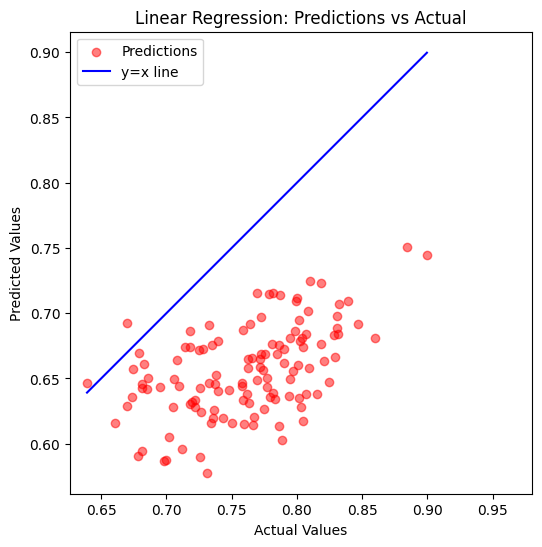

In [ ]:
# Linear Regression Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr, color='red', alpha=0.5, label='Predictions')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='blue', label='y=x line')
plt.title('Linear Regression: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

In [ ]:
features = data.drop('y', axis=1)
labels = data['y']

# Split the data into training and test sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)

feature_list = list(features.columns)

Training Features Shape: (456, 16)
Training Labels Shape: (456,)
Testing Features Shape: (152, 16)
Testing Labels Shape: (152,)


In [ ]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

# Use the forest's predict method on the test data
predictions = rf.predict(test_features)
# Calculate the absolute errors
errors = abs(predictions - test_labels)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
score = r2_score(test_labels, predictions)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / test_labels)
mse_rf = mean_squared_error(test_labels, predictions)
print(f"RandomForest MSE: {mse_rf}")
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.03 degrees.
The accuracy of our model is 85.0%
RandomForest MSE: 0.0010474555055043327
Accuracy: 96.41 %.


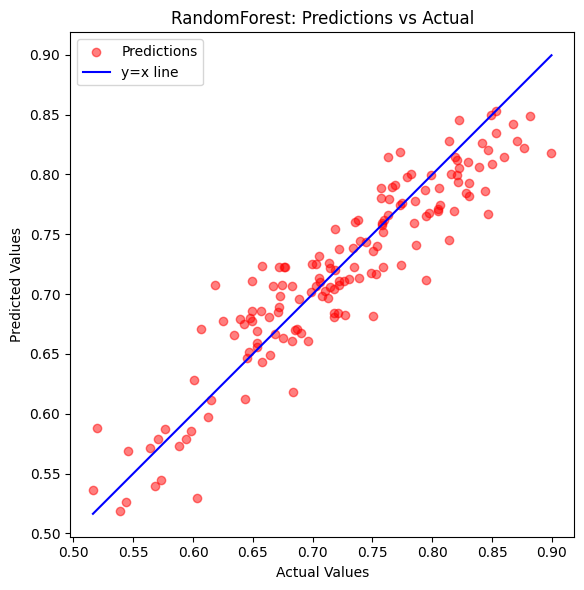

In [ ]:
import matplotlib.pyplot as plt

#Random Forest Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(test_labels, predictions, color='red', alpha=0.5, label='Predictions')
plt.plot([min(test_labels), max(test_labels)], [min(test_labels), max(test_labels)], color='blue', label='y=x line')
plt.title('RandomForest: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

MSE: 0.00


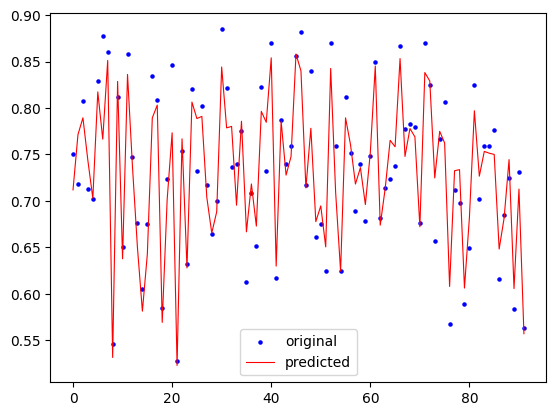

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
x = data.drop(['y'], axis=1)
y = data['y']

xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=12,
             test_size=0.15)
# with new parameters
gbr = GradientBoostingRegressor(n_estimators=600,
    max_depth=5,
    learning_rate=0.01,
    min_samples_split=3)
# with default parameters
#gbr = GradientBoostingRegressor()

gbr.fit(xtrain, ytrain)

ypred = gbr.predict(xtest)
mse = mean_squared_error(ytest,ypred)
print("MSE: %.2f" % mse)

x_ax = range(len(ytest))
plt.scatter(x_ax, ytest, s=5, color="blue", label="original")
plt.plot(x_ax, ypred, lw=0.8, color="red", label="predicted")
plt.legend()
plt.show()

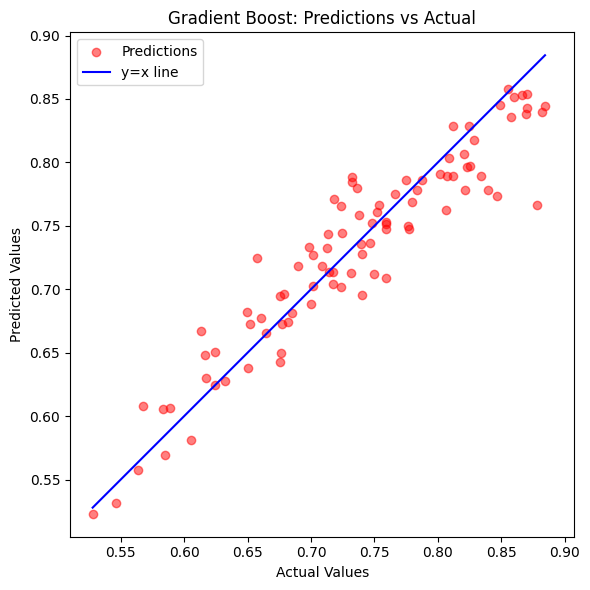

Mean Absolute Error: 0.02 degrees.
92
The accuracy of our model is 88.0%
Accuracy: 96.91 %.


In [ ]:
from sklearn.metrics import r2_score
#Gradient Boosting Predictions vs Actual
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(ytest, ypred, color='red', alpha=0.5, label='Predictions')
plt.plot([min(ytest), max(ytest)], [min(ytest), max(ytest)], color='blue', label='y=x line')
plt.title('Gradient Boost: Predictions vs Actual')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.legend()
plt.axis('square')

plt.tight_layout()
plt.show()

# Calculate the absolute errors
errors = abs(ypred - ytest)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
print(ypred.shape[0])
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / ytest)
score = r2_score(ytest, ypred)
print("The accuracy of our model is {}%".format(round(score, 2) *100))
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')